# 01. introdução

## encontrando conectores chave

In [1]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

for user in users:
    user["friends"] = []

for i,j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

def number_of_friends(user):
    """quantos amigos o usuário tem?"""
    return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)

num_users = len(users)
avg_connections = total_connections // num_users

# cria uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"],number_of_friends(user)) for user in users]

sorted(num_friends_by_id, key=lambda user_tuple: user_tuple[1], reverse=True)

print("total_connections: " + str(total_connections))
print("num_users: " + str(num_users))
print("avg_connections: " + str(avg_connections))
print("num_friends_by_id: " + str(num_friends_by_id))

total_connections: 24
num_users: 10
avg_connections: 2
num_friends_by_id: [(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


## cientistas de dados que você talvez conheça

In [2]:
def friends_of_friend_ids_bad(user):
    # "foaf" é abreviação de "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"]
            for foaf in friend["friends"]]

print(friends_of_friend_ids_bad(users[0]))

print([friend["id"] for friend in users[0]["friends"]])
print([friend["id"] for friend in users[1]["friends"]])
print([friend["id"] for friend in users[2]["friends"]])

from collections import Counter
def not_the_same(user,other_user):
    """dois usuários não são os mesmo se possuem ids diferentes"""
    return user["id"] != other_user["id"]

def not_friends(user,other_user):
    """other_user não é um amigo se não está em user["friends];
    isso é, se é not_the_same com todas as pessoas em user["friends"]"""
    return all(not_the_same(friend,other_user)
               for friend in user["friends"])

def friends_of_friends_ids(user):
    """encontra o id para cada um dos meus amigos que contam
    *their* amigos que não sejam eu e que não são meus amigos"""
    return Counter(foaf["id"]
                   for friend in user["friends"]
                   for foaf in friend["friends"]
                   if not_the_same(user,foaf)
                   and not_friends(user,foaf))

print(friends_of_friends_ids(users[3]))

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    return [user_id for user_id,user_interest in interests
            if user_interest == target_interest]

print(data_scientists_who_like("machine learning"))

from collections import defaultdict

# as chave são interesses, os valores são listas de user_ids com interests
user_ids_by_interest = defaultdict(list)
for user_id,interest in interests:
    user_ids_by_interest[interest].append(user_id)

# as chaves são user_ids, os valores são as listas de interest para aquele user_id
interests_by_user_id = defaultdict(list)
for user_id,interest in interests:
    interests_by_user_id[user_id].append(interest)

def most_commom_interest_with(user):
    """itera sobre os interesses do usuário;
    para cada interesse, itera sobre os outros usuários com aquele interesse;
    mantém a cotagem de quantas vezes vemos cada outro usuário"""
    return Counter(interested_user_id
                   for interest in interests_by_user_id[user["id"]]
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user["id"])

print(most_commom_interest_with(users[3]))

[0, 2, 3, 0, 1, 3]
[1, 2]
[0, 2, 3]
[0, 1, 3]
Counter({0: 2, 5: 1})
[4, 7]
Counter({5: 2, 6: 2, 2: 1, 4: 1})


## salários e experiência

In [3]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)]

# as chaves são os anos, os valores são as listas dos salários para cada ano
salary_by_tenure = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# as chaves são os anos, cada valor é a média salarial para aquele ano
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure,salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

def tenure_bucket(tenure):
    """salários agrupados em grupos"""
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"
    
# as chaves são agrupamentos dos casos, os valores são as listas
# dos salários para aquele agrupamento
salary_by_tenure_bucket = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# as chaves são agrupamentos dos casos, os valores são
# a média salarial para aquele agrupamento
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket,salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


## contas pagas

In [4]:
# 0.7 paid
# 1.9 unpaid
# 2.5 paid
# 4.2 unpaid
# 6 unpaid
# 6.5 unpaid
# 7.5 unpaid
# 8.1 unpaid
# 8.7 paid
# 10 paid

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"
    
print(predict_paid_or_unpaid(0.7))
print(predict_paid_or_unpaid(5))
print(predict_paid_or_unpaid(9))

paid
unpaid
paid


## tópicos de interesse

In [5]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word,count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


# 03. visualização de dados



## matplotlib


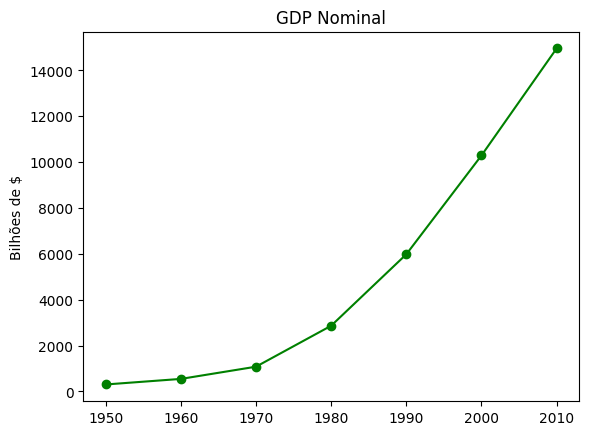

In [6]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# cria um gráfico de linha, anos no eixo x, gdp no eixo y
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')

# adiciona um título
plt.title("GDP Nominal")

# adiciona um selo no eixo y
plt.ylabel("Bilhões de $")

plt.show()



## gráfico de barras


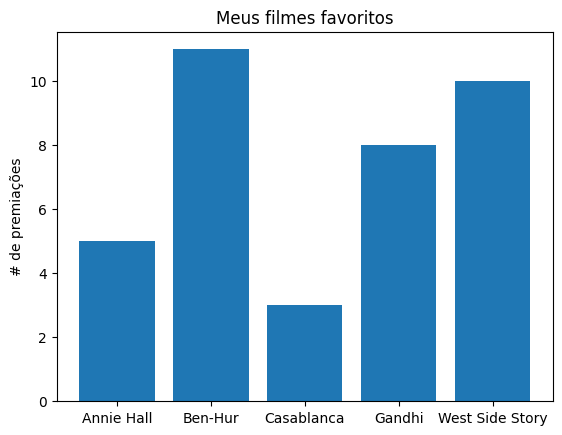

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# barras possuem o tamanho padrão de 0.8, então adicionaremos 0.1 às
# coordenadas à esquerda para que cada barra seja centralizada
xs = [i for i,_ in enumerate(movies)]

# as barras do gráfico com as coordenadas x à esquerda [xs], alturas [num_oscars]
plt.bar(xs,num_oscars)

plt.ylabel("# de premiações")
plt.title("Meus filmes favoritos")

# nomeia o eixo x com nomes de filmes na barra central
plt.xticks([i for i,_ in enumerate(movies)],movies)

plt.show()


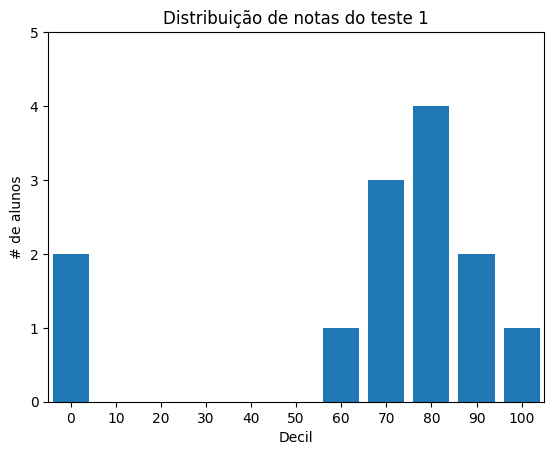

In [8]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10*10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x for x in histogram.keys()], # move cada barra para a esquerda em 4
        histogram.values(), # dá para cada barra sua altura correta
        8) # dá para cada barra a largura de 8

plt.axis([-5, 105, 0, 5]) # eixo x de -5 até 105,eixo y de 0 até 5

plt.xticks([10 * i for i in range(11)]) # rótulos do eixo x em 0,10,...,100
plt.xlabel("Decil")
plt.ylabel("# de alunos")
plt.title("Distribuição de notas do teste 1")
plt.show()


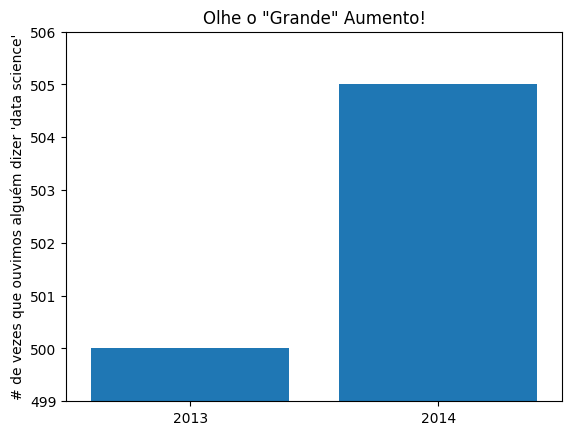

In [9]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar(years, mentions, 0.8)
plt.xticks(years)

plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")

# se você não fizer isso, matplotlib nomeará o eixo x de 0, 1
# e então adiciona a +2.013e3 para fora do canto (matplotlib feio!)
plt.ticklabel_format(useOffset=False)

# enganar o eixo y mostra apenas a parte acima de 500
plt.axis([2012.5,2014.5,499,506])
plt.title('Olhe o "Grande" Aumento!')
plt.show()


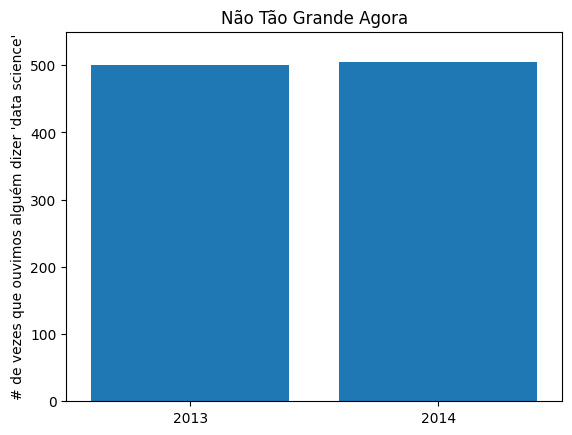

In [10]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)

plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")

# se você não fizer isso, matplotlib nomeará o eixo x de 0, 1
# e então adiciona a +2.013e3 para fora do canto (matplotlib feio!)
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5,2014.5,0,550])
plt.title("Não Tão Grande Agora")
plt.show()


## gráfico de linhas


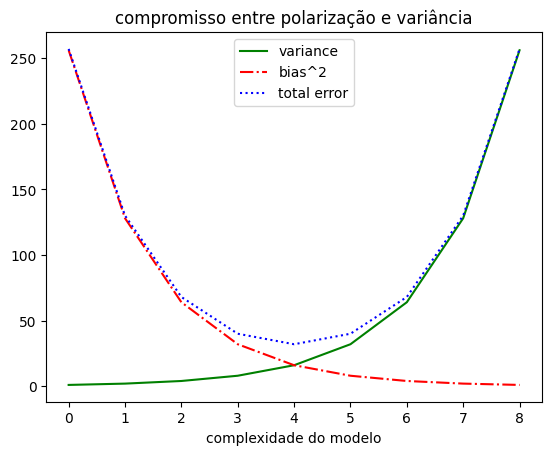

In [11]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x,y in zip(variance,bias_squared)]
xs = [i for i,_ in enumerate(variance)]

# podemos fazer múltiplas chamadas plt.plot
# para mostrar múltiplas séries no mesmo gráfico
plt.plot(xs,variance,'g-',label='variance') # linha verde sólida
plt.plot(xs,bias_squared,'r-.',label='bias^2') # linha com linha de ponto tracejado vermelho
plt.plot(xs,total_error,'b:',label='total error') # linha com pontilhado azul

# porque atribuímos rótulos para cada série
# podemos obter uma legenda gratuita
# loc=9 significa "top center"
plt.legend(loc=9)
plt.xlabel("complexidade do modelo")
plt.title("compromisso entre polarização e variância")
plt.show()



## gráfico de dispersão


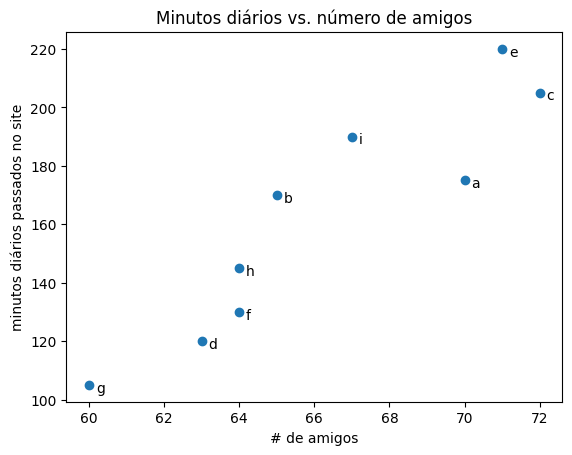

In [12]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends,minutes)

#nomeia cada posição
for label,friend_count,minute_count in zip(labels,friends,minutes):
    plt.annotate(label,
                 xy=(friend_count,minute_count), # coloca o rótulo com sua posição
                 xytext=(5,-5), # mas compensa um pouco
                 textcoords='offset points')
    
plt.title("Minutos diários vs. número de amigos")
plt.xlabel('# de amigos')
plt.ylabel('minutos diários passados no site')
plt.show()


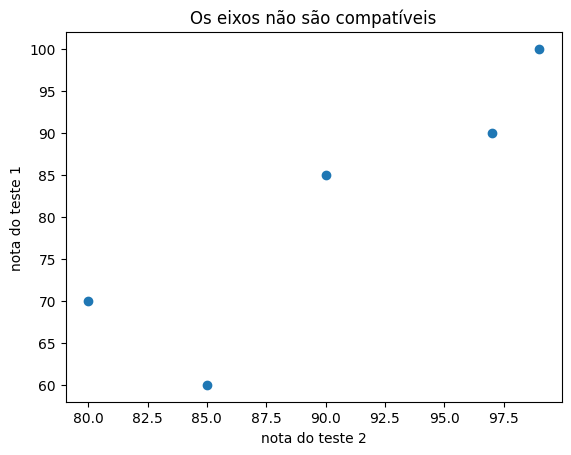

In [13]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Os eixos não são compatíveis")
plt.xlabel("nota do teste 2") 
plt.ylabel("nota do teste 1")
plt.show()


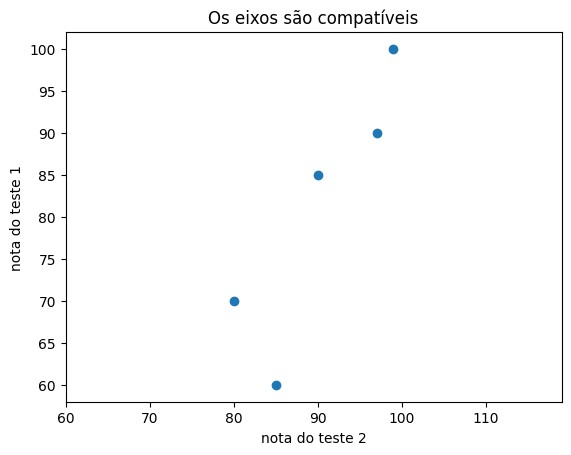

In [14]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Os eixos são compatíveis")
plt.xlabel("nota do teste 2")
plt.ylabel("nota do teste 1")
plt.axis('equal')
plt.show()


# 04. algebra linear


## vetores


In [15]:

def vector_add(v,w):
    """soma elementos correspondentes"""
    return [v_i + w_i for v_i,w_i in zip(v,w)]

def vector_subtract(v,w):
    """subtrai elementos correspondentes"""
    return [v_i - w_i for v_i,w_i in zip(v,w)]

def vector_sum(vectors):
    """soma elementos correspondentes"""
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result,vector)
    return result

from functools import reduce,partial
def vector_sum(vectors):
    return reduce(vector_add,vectors)

# vector_sum = partial(reduce,vector_add)

def scalar_multiply(c,v):
    """c é um número, v é um vetor"""
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """computar o vetor cujo i-ésimo elemento seja a média dos
    i-ésimos elementos dos vetores inclusos"""
    n = len(vectors)
    return scalar_multiply(1/n,vector_sum(vectors))

def dot(v,w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v,v)

import math
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v,w):
    """(v_1 - w_1)**2 + ... + (v_n - w_n)**2"""
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(squared_distance(v,w))

def distance(v,w):
    return magnitude(vector_subtract(v,w))




## matrizes


In [16]:

# A possui duas linhas e três colunas
A = [[1, 2, 3],
     [4, 5, 6]]

# B possui três linhas e duas colunas
B = [[1, 2],
     [3, 4],
     [5, 6]]

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows,num_cols

def get_row(A,i):
    return A[i]

def get_column(A,j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows,num_cols,entry_fn):
    """retorna a matriz num_rows X num_cols
    cuja entrada (i,j)th é entry_fn(i,j)"""
    return [[entry_fn(i,j)
             for j in range(num_cols)]
             for i in range(num_rows)]

def is_diagonal(i,j):
    """1's na diagonal, 0's no demais lugares"""
    return 1 if i == j else 0


# 05. estatística

## descrevendo um conjunto único de dados

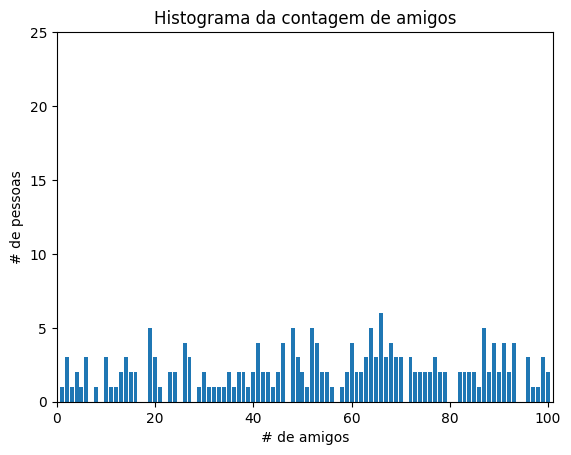

In [32]:
import random

num_friends = [random.randint(1,100) for _ in range(204)]

friend_counts = Counter(num_friends)
xs = range(101) # o valor maior é 100
ys = [friend_counts[x] for x in xs] # a altura é somente # de amigos
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Histograma da contagem de amigos')
plt.xlabel('# de amigos')
plt.ylabel('# de pessoas')
plt.show()

In [33]:
# número de pontos nos dados
num_points = len(num_friends)
print(num_points)

# maiores e menos valores
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
print(smallest_value)
second_smallest_value = sorted_values[1]
print(second_smallest_value)
second_largest_value = sorted_values[-2]
print(second_largest_value)


204
100
1
1
2
100


## tendências centrais

In [34]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

54.05392156862745

In [35]:
def median(v):
    """encontra o valor mais ao meio de v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # se for ímpar, retorna o valor do meio
        return sorted_v[midpoint]
    else:
        # se for par, retorna a média dos valores do meio
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo]+sorted_v[hi])/2
    
median(num_friends)

55.5

In [36]:
def quantile(x,p):
    """retorna o valor percentual p-ésimo em x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.10))
print(quantile(num_friends,0.25))
print(quantile(num_friends,0.75))
print(quantile(num_friends,0.95))

14
33
76
93


In [37]:
def mode(x):
    """retorna uma lista, pode haver mais de uma moda"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[66]

## dispersão

In [38]:
# "amplitude" já possui significado em Python, então usaremos um nome diferente
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [39]:
def de_mean(x):
    """desloca x ao subtrair sua média (então o resultado tem a média 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """presume que x tem ao menos dois elemetos"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

variance(num_friends)

749.627620013522

In [40]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

27.37932833386389

In [41]:
def interquantile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

interquantile_range(num_friends)

43

## correlação

In [42]:
daily_minutes = [random.randint(1,60*24) for _ in range(204)]

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y))/(n-1)

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/stdev_x/stdev_y
    else:
        return 0 # se não houver amplitude a correlação é zero
    
outlier = num_friends.index(100) # índice do valor discrepante

num_friends_good = [x
                    for i,x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                    for i,x in enumerate(daily_minutes)
                    if i != outlier]

correlation(num_friends_good,daily_minutes_good)


0.031030599581652805

# 06. probabilidade

In [43]:
def random_kid():
    return random.choice(["boy","girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1

print('P(both|older): ', both_girls / older_girl)
print('P(both|either): ', both_girls / either_girl)

P(both|older):  0.5007089325501317
P(both|either):  0.3311897106109325


## distribuições contínuas

In [44]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    """retorna a probabilidade de uma variável aleatória uniforme ser <= x"""
    if x < 0: return 0 # a aleatória uniforme nunca é menor do que 0
    elif x < 1: return x # por exemplo P(x <= 0,4) = 0,4
    else: return 1 # a aleatória uniforme sempre é menor do que 1

## a distribuição normal

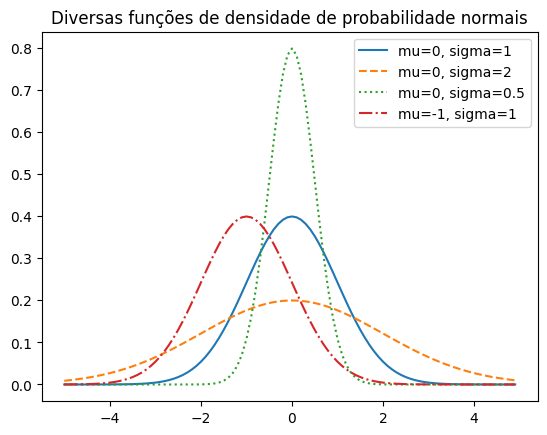

In [49]:
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1, sigma=1')
plt.legend()
plt.title('Diversas funções de densidade de probabilidade normais')
plt.show()

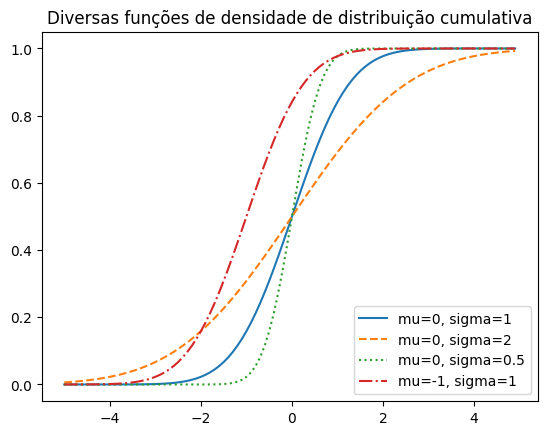

In [50]:
def normal_cdf(x,mu=0,sigma=1):
    return (1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1, sigma=1')
plt.legend(loc=4) # bottom tight
plt.title('Diversas funções de densidade de distribuição cumulativa')
plt.show()

In [51]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    """encontra o inverso mais próximo usando a busca binária"""
    # se não for padrão, computa o padrão e redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    low_z,low_p = -10.0,0 # normal_cdf(-10) está (muito perto de) 0
    hi_z,ho_p = 10.0,1 # normal_cdf(10) está (muito perto de ) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z)/2 # considera o ponto do meio o valor
        mid_p = normal_cdf(mid_z) # função de distribuição cumulativa lá
        if mid_p < p:
            # o ponto do meio ainda está baixo, procura acima
            low_z,low_p = mid_z,mid_p
        elif mid_p > p:
            # o ponto do meio ainda está alto, procura abaixo
            hi_z,hi_p = mid_z,mid_p
        else:
            break
    return mid_z

## o teorema do limite central

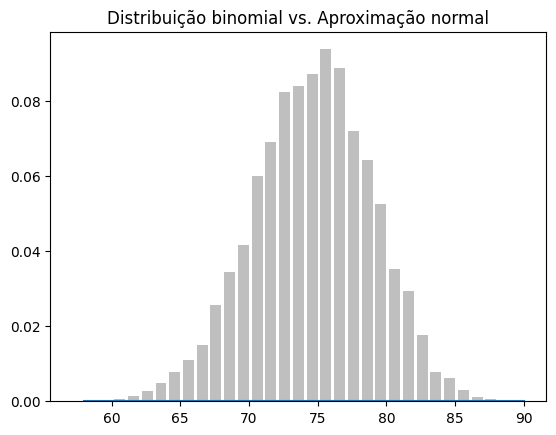

In [54]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    # usa um gráfico de barras para exibir as amostras binomiais atuais
    histogram = Counter(data)
    plt.bar([x -0.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))
    # usa um gráfico de linhas para exibir uma aproximação do normal
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(1 + 0.5,mu,sigma) - normal_cdf(1-0.5,mu,sigma)
           for i in xs]
    plt.plot(xs,ys)
    plt.title('Distribuição binomial vs. Aproximação normal')
    plt.show()

make_hist(0.75,100,10000)

# 07. hipótese e inferência

## teste estatístico de hipótese

### exemplo: lançar uma moeda

In [55]:
def normal_approximation_to_binomial(n,p):
    """encontra mi e sigma correspondendo ao Binomial(n,p)"""
    mu = p * n
    sigma = math.sqrt(p * (1-p) * n)
    return mu, sigma

# o cdf normal é a probabilidade que a variável esteja abaixo de um limite
normal_probability_below = normal_cdf

# está acima do limite se não estiver abaixo
def normal_probability_above(lo,mu=0,sigma=1):
    return 1 - normal_cdf(lo,mu,sigma)

# está entre se for menos do que hi, mas não menor do que lo
def normal_probability_between(lo,hi,mu=0,sigma=1):
    return normal_cdf(hi,mu,sigma)-normal_cdf(lo,mu,sigma)

# está fora se não estiver entre
def normal_probability_outside(lo,hi,mu=0,sigma=1):
    return 1 - normal_probability_between(lo,hi,mu,sigma)

def normal_upper_bound(probability,mu=0,sigma=1):
    """retorna z para que p(Z <= z) = probability"""
    return inverse_normal_cdf(probability,mu,sigma)

def normal_lower_bound(probability,mu=0,sigma=1):
    """retorna z para que p(Z >= z) = probability"""
    return inverse_normal_cdf(1-probability,mu,sigma)

def normal_two_sided_bounds(probability,mu=0,sigma=1):
    """retorna os limites simétricos (sobre a média)
    que contêm a probabilidade específica"""
    tail_probability = (1-probability)/2
    # limite superior deveria ter tail_probability acima
    upper_bound = normal_lower_bound(tail_probability,mu,sigma)
    # limite inferior deveria ter tail_probability abaixo
    lower_bound = normal_upper_bound(tail_probability,mu,sigma)
    return lower_bound,upper_bound

mu_0,sigma_0 = normal_approximation_to_binomial(1000,0.5)
print(mu_0,sigma_0)

500.0 15.811388300841896


In [56]:
normal_two_sided_bounds(0.95,mu_0,sigma_0)

(469.01026640487555, 530.9897335951244)

In [57]:
# 95% dos limites baseados na premissa p é 0,5
lo,hi = normal_two_sided_bounds(0.95,mu_0,sigma_0)

# mi e sigma reais baseadas em p=0,55
mu_1,sigma_1 = normal_approximation_to_binomial(1000,0.55)

# um erro tipo 2 significa que falhamos ao rejeitar a hipótese nula
# que acontecerá quando X ainda estiver em nosso intervalo original
type_2_probability = normal_probability_between(lo,hi,mu_1,sigma_1)
power = 1 - type_2_probability
print(power)

0.886548001295367


In [58]:
hi = normal_upper_bound(0.95,mu_0,sigma_0)
print(hi)

type_2_probability = normal_probability_below(hi,mu_1,sigma_1)
power = 1 - type_2_probability
print(power)

526.0073585242053
0.9363794803307173


## p-values

In [59]:
def two_sided_p_value(x,mu=0,sigma=1):
    if x >= mu:
        # se x for maior do que a média, a coroa será o que for maior do que x
        return 2 * normal_probability_above(x,mu,sigma)
    else:
        # se x for menor do que a média, a coroa será o que for menor do que x
        return 2 * normal_probability_below(x,mu,sigma)
    
two_sided_p_value(529.5,mu_0,sigma_0)

0.06207721579598835

In [60]:
extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0 # contagem do # de caras
                    for _ in range(1000)) # em 1000 lançamentos
    if num_heads >= 530 or num_heads <= 470: # e contagem da frequência
        extreme_value_count += 1 # que # é 'extrema'

print(extreme_value_count/100000)

0.06249


In [61]:
two_sided_p_value(531.5,mu_0,sigma_0)

0.046345287837786575

In [62]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

print(upper_p_value(524.5,mu_0,sigma_0))
print(upper_p_value(526.5,mu_0,sigma_0))

0.06062885772582072
0.04686839508859242


## intervalos de confiança

In [63]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1-p_hat)/1000)
print(sigma)

0.015791611697353755


In [64]:
normal_two_sided_bounds(0.95,mu,sigma)

(0.4940490278129096, 0.5559509721870904)